In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [73]:
import zipfile
import os

zip_path = '/content/drive/MyDrive/Reduced MNIST Data.zip'

extract_folder = '/content/dataset'
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)
    print('Extraction Complete')

Extraction Complete


In [74]:
extracted_folder = '/content/dataset/Reduced MNIST Data'

In [75]:
image_dir = os.listdir(extracted_folder)
print(image_dir[:5])

['9 (469).jpg', '5 (47).jpg', '2 (719).jpg', '1 (677).jpg', '7 (239).jpg']


In [76]:
from PIL import Image

In [77]:
data = []
labels = []

for image_dir in os.listdir(extracted_folder):
    if image_dir.endswith(('.jpg')):
        label = int(image_dir[0])

        image_path = os.path.join(extracted_folder, image_dir)
        image = Image.open(image_path).convert('L')
        image = image.resize((28, 28))
        data.append(np.array(image).flatten())
        labels.append(label)

In [78]:
X = np.array(data)
display(X)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [79]:
y = np.array(labels)
display(y)

array([9, 5, 2, ..., 4, 1, 6])

In [80]:
print('X Shape: ',X.shape, '\n', 'y Shape: ',y.shape)

X Shape:  (10000, 784) 
 y Shape:  (10000,)


In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [82]:
#train_images = X_train / 255.0
#test_images = X_test / 255.0
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_images_dir = scaler.fit_transform(X_train)
test_images_dir = scaler.transform(X_test)


In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values = [5, 7, 9]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy:.4f}")

Accuracy for k=5: 0.9560
Accuracy for k=7: 0.9556
Accuracy for k=9: 0.9548


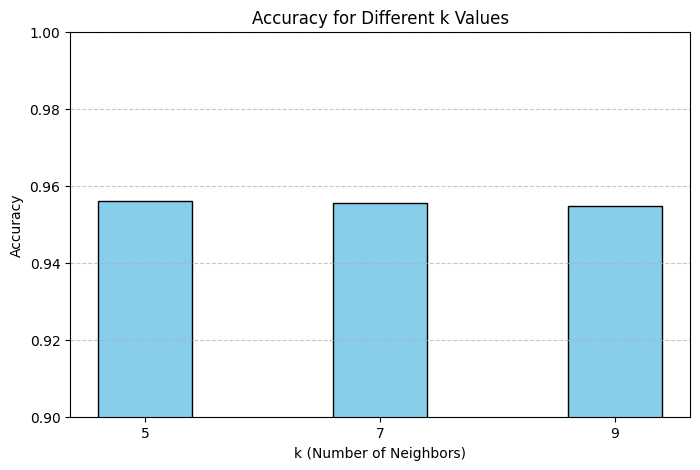

In [84]:
plt.figure(figsize=(8, 5))
plt.bar(k_values, results, color='skyblue', edgecolor='black')
plt.title('Accuracy for Different k Values')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1)
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


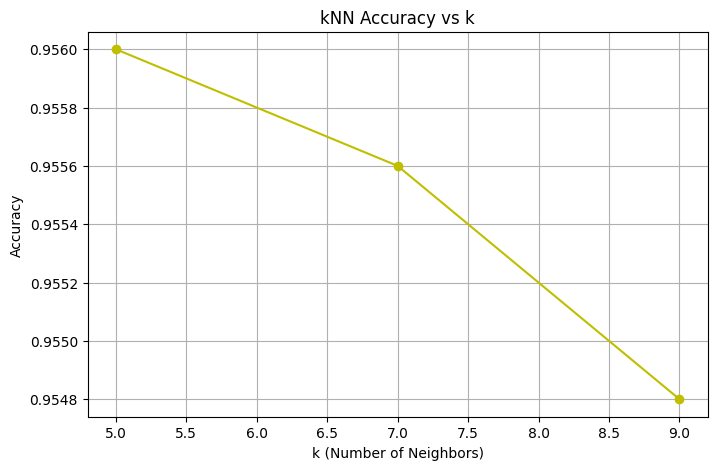

In [85]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, results, marker='o', linestyle='-', color='y')
plt.title('kNN Accuracy vs k')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [86]:
best_k = k_values[np.argmax(results)]
print(f"Best k value: {best_k}")

Best k value: 5


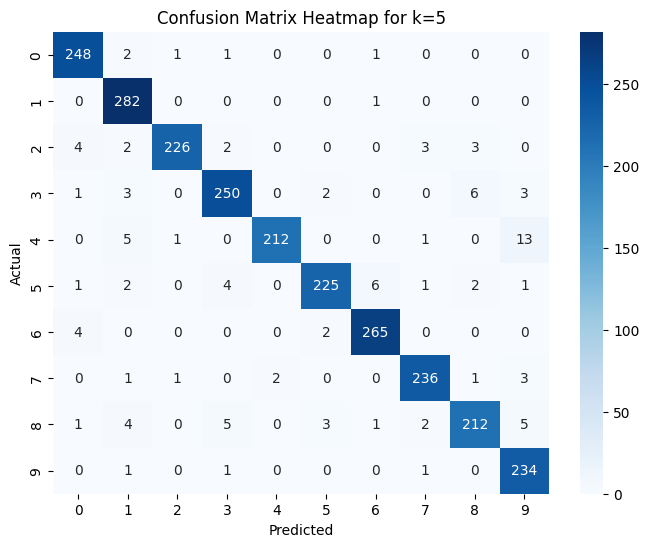

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title(f'Confusion Matrix Heatmap for k={k}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


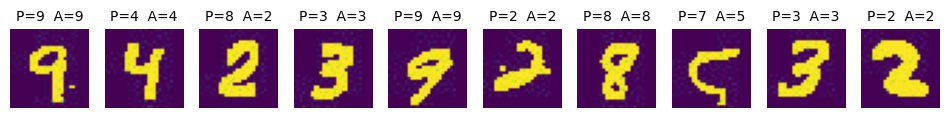

In [92]:
random = np.random.choice(len(X_test), 10, replace=False)
tests = X_test[random]
actuals = y_test[random]
predictions = knn.predict(tests)

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(tests[i].reshape(28, 28),  cmap='viridis')
    plt.title(f"P={predictions[i]}  A={actuals[i]}", fontsize=10)
    plt.axis('off')

plt.show()
